In [2]:
# we either load the data line by line or load it directly as a single huge text string
with open("./data.txt", "r") as data_file:
    # for line in data_file:
    #     lines.append(line)
    data = data_file.read()

In [3]:
import re

# Clean the data
def clean_and_tokenize(text):
    # Use regex to replace anything that is not a letter with a space
    cleaned_text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    # tokenize
    tokens = cleaned_text.split(' ')
    #remove stopwords
    with open("./stopwords-en.txt", "r") as f:
        stop_words = f.read()
    stop_words = stop_words.replace('\n', ' ').split(' ')
    return [token for token in tokens if token not in stop_words][:-1]

tokens = clean_and_tokenize(data)
tokens

['today',
 'world',
 'data',
 'science',
 'plays',
 'pivotal',
 'role',
 'extracting',
 'insights',
 'vast',
 'amounts',
 'data',
 'data',
 'scientists',
 'utilize',
 'various',
 'techniques',
 'analyze',
 'data',
 'including',
 'statistical',
 'analysis',
 'machine',
 'learning',
 'deep',
 'learning',
 'algorithms',
 'natural',
 'language',
 'processing',
 'nlp',
 'subset',
 'data',
 'science',
 'focuses',
 'understanding',
 'processing',
 'human',
 'language',
 'nlp',
 'applications',
 'widespread',
 'chatbots',
 'provide',
 'customer',
 'support',
 'sentiment',
 'analysis',
 'tools',
 'gauge',
 'public',
 'opinion',
 'social',
 'media',
 'platforms',
 'nlp',
 'computers',
 'comprehend',
 'text',
 'extract',
 'relevant',
 'information',
 'even',
 'generate',
 'human',
 'like',
 'responses',
 'computer',
 'vision',
 'another',
 'branch',
 'artificial',
 'intelligence',
 'enables',
 'machines',
 'interpret',
 'understand',
 'visual',
 'data',
 'computer',
 'vision',
 'autonomous',
 've

In [6]:
unique_words = set(tokens)
# dicts for word to id and vice versa
word_id = {word:i for (i,word) in enumerate(unique_words)}
id_word = {i:word for (i,word) in enumerate(unique_words)}

In [11]:
word_id

{'safety': 0,
 'vibrant': 1,
 'responses': 2,
 'bonds': 3,
 'innovative': 4,
 'moments': 5,
 'inspired': 6,
 'celebrate': 7,
 'enthusiasts': 8,
 'smallpox': 9,
 'devices': 10,
 'collaboration': 11,
 'cinnamon': 12,
 'machine': 13,
 'cooking': 14,
 'exploration': 15,
 'realm': 16,
 'stories': 17,
 'comfort': 18,
 'anatomy': 19,
 'breakthroughs': 20,
 'imaging': 21,
 'hadoop': 22,
 'information': 23,
 'provide': 24,
 'delicate': 25,
 'extracting': 26,
 'simmering': 27,
 'systems': 28,
 'tailor': 29,
 'eggs': 30,
 'herbs': 31,
 'lift': 32,
 'treats': 33,
 'cookies': 34,
 'yeast': 35,
 'learning': 36,
 'instrumental': 37,
 'asian': 38,
 'financial': 39,
 'creates': 40,
 'pharmacology': 41,
 'ensuring': 42,
 'grill': 43,
 'deadly': 44,
 'vaccines': 45,
 'secret': 46,
 'strokes': 47,
 'feeding': 48,
 'interpret': 49,
 'diseases': 50,
 'possibilities': 51,
 'prescribing': 52,
 'baked': 53,
 'generate': 54,
 'monitoring': 55,
 'cancer': 56,
 'branch': 57,
 'seasonings': 58,
 'visual': 59,
 'ed

In [12]:
id_word

{0: 'safety',
 1: 'vibrant',
 2: 'responses',
 3: 'bonds',
 4: 'innovative',
 5: 'moments',
 6: 'inspired',
 7: 'celebrate',
 8: 'enthusiasts',
 9: 'smallpox',
 10: 'devices',
 11: 'collaboration',
 12: 'cinnamon',
 13: 'machine',
 14: 'cooking',
 15: 'exploration',
 16: 'realm',
 17: 'stories',
 18: 'comfort',
 19: 'anatomy',
 20: 'breakthroughs',
 21: 'imaging',
 22: 'hadoop',
 23: 'information',
 24: 'provide',
 25: 'delicate',
 26: 'extracting',
 27: 'simmering',
 28: 'systems',
 29: 'tailor',
 30: 'eggs',
 31: 'herbs',
 32: 'lift',
 33: 'treats',
 34: 'cookies',
 35: 'yeast',
 36: 'learning',
 37: 'instrumental',
 38: 'asian',
 39: 'financial',
 40: 'creates',
 41: 'pharmacology',
 42: 'ensuring',
 43: 'grill',
 44: 'deadly',
 45: 'vaccines',
 46: 'secret',
 47: 'strokes',
 48: 'feeding',
 49: 'interpret',
 50: 'diseases',
 51: 'possibilities',
 52: 'prescribing',
 53: 'baked',
 54: 'generate',
 55: 'monitoring',
 56: 'cancer',
 57: 'branch',
 58: 'seasonings',
 59: 'visual',
 60:

## Training Data

There are two approaches:
* CBOW (continuous bag-of-words): context word is input, center word is output.
* Skip-gram: center word is input, context word is output.

In this notebook, we'll go with the first approach

In [13]:
window_size = 2

def target_context_tuples(tokens, window_size):
    # target = []
    context = []
    for i, token in enumerate(tokens):
        context_words = [t for t in merge(tokens, i, window_size) if t != token]
        for c in context_words:
            context.append((token, c))
    return context


def merge(tokens, i, window_size):
    left_id = i - window_size if i >= window_size else i - 1 if i != 0 else i
    right_id = i + window_size + 1 if i + window_size <= len(tokens) else len(tokens)
    return tokens[left_id:right_id]

In [14]:
target_context_pairs = target_context_tuples(tokens, 2)
target_context_pairs[:20]

[('today', 'world'),
 ('today', 'data'),
 ('world', 'today'),
 ('world', 'data'),
 ('world', 'science'),
 ('data', 'today'),
 ('data', 'world'),
 ('data', 'science'),
 ('data', 'plays'),
 ('science', 'world'),
 ('science', 'data'),
 ('science', 'plays'),
 ('science', 'pivotal'),
 ('plays', 'data'),
 ('plays', 'science'),
 ('plays', 'pivotal'),
 ('plays', 'role'),
 ('pivotal', 'science'),
 ('pivotal', 'plays'),
 ('pivotal', 'role')]

In [15]:
import pandas as pd
df = pd.DataFrame(target_context_pairs, columns=["target","context"])
df

,target,context
0,today,world
1,today,data
2,world,today
3,world,data
4,world,science
...,...,...
3481,world,rich
3482,world,diverse
3483,world,cuisine
3484,cuisine,diverse


In [16]:
import torch

def one_hot_encode(token, vocab_size):
    # need to return float, had problems with ints
    one_hot_encoding = [0]*vocab_size
    one_hot_encoding[word_id[token]] = 1
    return torch.tensor(one_hot_encoding, dtype=torch.float32)


# def one_hot_encode(id ,vocab_size):
#     one_hot_encoding = [0]*vocab_size
#     one_hot_encoding[id] = 1
#     return one_hot_encoding

vocab_size = len(unique_words)

df["target_ohe"] = df["target"].apply(lambda x : one_hot_encode(x, vocab_size))
df["context_ohe"] = df["context"].apply(lambda x : one_hot_encode(x, vocab_size))
df

/home/otmane/miniconda3/envs/ocr/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,target,context,target_ohe,context_ohe
0,today,world,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
1,today,data,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
2,world,today,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
3,world,data,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
4,world,science,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
...,...,...,...,...
3481,world,rich,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
3482,world,diverse,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
3483,world,cuisine,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
3484,cuisine,diverse,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."


In [17]:
from torch.utils.data import Dataset

class W2VDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        context = torch.tensor(df["context_ohe"][idx])
        target = torch.tensor(df["target_ohe"][idx])
        return context, target
        # return {"context": context, "target": target}

dataset = W2VDataset(df)

print(len(dataset))
print(dataset[2])

3486
(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.

/tmp/ipykernel_22641/2901329973.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  context = torch.tensor(df["context_ohe"][idx])
/tmp/ipykernel_22641/2901329973.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(df["target_ohe"][idx])


In [18]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [19]:
import torch

class Word2Vec(torch.nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        self.linear1 = torch.nn.Linear(vocab_size, 10) # might change this with nn.Embedding
        self.linear2 = torch.nn.Linear(10, vocab_size)
        # self.softmax = torch.nn.Softmax() # loss function does it for us :D

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        # x = self.softmax(x)
        return x


model = Word2Vec()
model

Word2Vec(
  (linear1): Linear(in_features=614, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=614, bias=True)
)

In [20]:
from torch import nn

LR = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)


In [21]:
epochs = 200

loss_values = []
for epoch in range(epochs):
    running_loss = 0.0
    # model.train() # no need since model is in train mode by default
    for batch, (context, target) in enumerate(dataloader):
        pred = model(context)
        loss = loss_fn(pred, target)
        loss.backward()
        running_loss += loss.item()
        optimizer.step()
        optimizer.zero_grad()

    # if epoch%10 == 0:
    #     print(f"Epoch {epoch} -- Loss {loss.item()/len(dataloader):.2f}")
        
    loss_values.append(running_loss/len(dataloader))

/tmp/ipykernel_22641/2901329973.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  context = torch.tensor(df["context_ohe"][idx])
/tmp/ipykernel_22641/2901329973.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(df["target_ohe"][idx])


Text(0, 0.5, 'Loss')

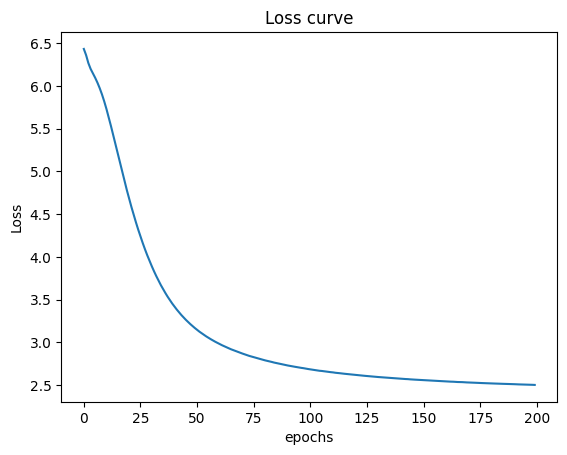

In [22]:
import matplotlib.pyplot as plt

plt.plot(loss_values)
plt.title("Loss curve")
plt.xlabel("epochs")
plt.ylabel("Loss")

In [24]:
def get_word_embedding(model, word):
    embeddings = model.linear2.weight.detach()
    id = word_id[word]
    return embeddings[id]

get_word_embedding(model, "cuisine")

tensor([ 0.0404,  0.5471,  0.2071, -0.7578, -0.3244, -0.4863, -1.1019, -0.5680,
        -1.3494,  0.8678])

In [25]:
word = one_hot_encode("cuisine", vocab_size)
torch.argsort(model(word), descending=True)

tensor([591, 364, 305, 332,  69, 185, 451, 276, 244, 603, 292, 469, 111, 435,
         14, 490,  15,   8, 388, 449, 421, 226, 380, 188, 154, 592, 576, 530,
         73, 569, 412,   5, 124, 539, 400, 478, 155, 442, 556,   1, 358, 293,
        203, 454, 193, 300, 566, 158, 498,  38, 180,  33, 386, 376, 345, 582,
        352, 267, 387, 347, 108, 606, 562, 316, 509, 575, 302, 147,  51, 230,
        377, 484, 140, 359,  36, 134, 262, 233, 189, 348,  82,  99, 115,  84,
        297, 142, 274, 294, 232, 119, 494, 156, 375, 423, 231, 342, 178, 207,
        239, 549, 100,   4, 391, 271, 223, 362, 473, 441, 452, 515, 131, 605,
         32, 455, 593, 118, 301, 408, 110, 145, 174, 381, 597, 323,  74, 486,
         93, 315,  24, 493, 120, 277, 123, 446, 308, 282, 563, 585, 208, 214,
         19, 463, 594, 559, 565, 225,  49, 355, 253, 356, 130, 398, 492, 317,
        280, 186,  71, 433,  59, 580, 161,  34, 518,  27, 564, 550,  46, 607,
        237, 170, 555, 304, 595, 122, 132, 545, 420, 104, 160, 5

In [33]:
word = one_hot_encode("cuisine", vocab_size)

x = [id_word[id.item()] for id in torch.argsort(model(word), descending=True)]
print(x[:5])

['fusion', 'dishes', 'world', 'offers', 'elements']


### Get embedding of a specific word

In [34]:
len(model.linear2.weight)

614

In [35]:
idx = word_id["cuisine"]

model(one_hot_encode("cuisine", vocab_size))

tensor([-6.9085e-01,  4.7974e+00, -2.8404e+00, -1.4072e+00,  2.9088e+00,
         5.1995e+00,  6.8622e-01, -4.1454e-01,  6.2242e+00, -6.8209e-01,
         6.9283e-01, -7.5288e+00, -2.6104e+00,  7.9596e-01,  6.9282e+00,
         6.4541e+00, -5.3374e+00,  5.8606e-01, -1.2729e+00,  2.0329e+00,
        -3.2623e+00, -2.0111e+00, -4.2344e+00, -7.8215e+00,  2.3092e+00,
         1.0254e+00, -4.2695e+00,  1.5972e+00, -1.0195e+01, -3.2795e+00,
         8.7103e-01,  1.0502e-01,  2.6876e+00,  4.5465e+00,  1.6307e+00,
         1.0566e-01,  3.6653e+00, -8.9101e+00,  4.6257e+00, -3.3920e+00,
         2.0521e-02, -6.3950e+00, -4.7254e+00, -4.4866e+00, -5.1393e+00,
        -2.5832e+00,  1.5588e+00, -3.7832e+00,  1.0653e-01,  1.9699e+00,
        -6.2385e-01,  3.8881e+00, -3.3360e+00,  2.5057e-01, -5.8932e+00,
        -1.5941e+00, -2.7924e+00,  1.5333e-01, -1.5129e+00,  1.6986e+00,
        -5.4418e+00, -8.1139e+00, -4.0699e+00,  9.4544e-01, -4.3442e+00,
        -4.4112e+00, -1.0139e+00, -5.9195e+00,  7.6

In [26]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=1000, metric="cosine")
embeddings = model.linear2.weight.detach().numpy()
embeddings_2d = tsne.fit_transform(embeddings)

In [27]:
embeddings_2d

array([[-19.970337 ,   4.6206346],
       [ -5.64365  ,  -8.944135 ],
       [-21.200958 ,  -2.859509 ],
       ...,
       [ -4.193626 , -21.117746 ],
       [ -7.4266305,  10.49911  ],
       [-13.62294  ,  -9.263724 ]], dtype=float32)

In [28]:
embeds_df = pd.DataFrame({"x": embeddings_2d[:,0], "y": embeddings_2d[:,1]})
embeds_df.head()

,x,y
0,-19.970337,4.620635
1,-5.643650,-8.944135
2,-21.200958,-2.859509
3,-3.986580,8.905164
4,-19.815332,-7.081145


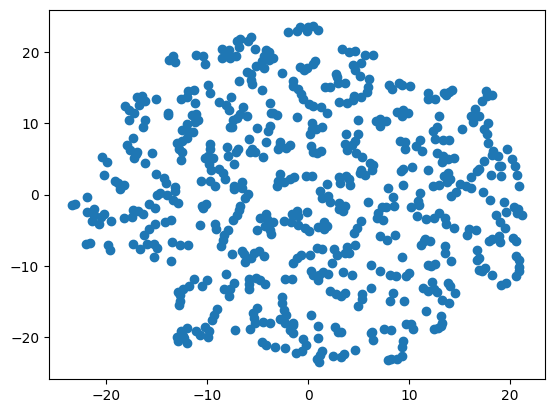

In [29]:
import matplotlib.pyplot as plt

plt.scatter(embeds_df.x, embeds_df.y)

In [31]:
import plotly.express as px

tsne = TSNE(n_components=3, n_iter=1000, metric="cosine")
embeddings3 = model.linear2.weight.detach().numpy()
embeddings_3d = tsne.fit_transform(embeddings)

embeds_df_3D = pd.DataFrame({"x": embeddings_3d[:,0], "y": embeddings_3d[:,1], "z": embeddings_3d[:,2]})

fig = px.scatter_3d(embeds_df, x='x', y='y', z='z')
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [33]:
embeds_df

array([[-21.084879  ,  -0.13972811,  10.021967  ],
       [ 13.61933   ,   3.7094576 ,  25.432228  ],
       [ -5.8068514 ,   5.7776284 ,   3.3925016 ],
       ...,
       [  9.240942  ,  16.934767  , -20.417202  ],
       [ -1.1251596 ,  16.31159   , -13.135644  ],
       [ -1.4252912 , -23.399412  , -34.938923  ]], dtype=float32)

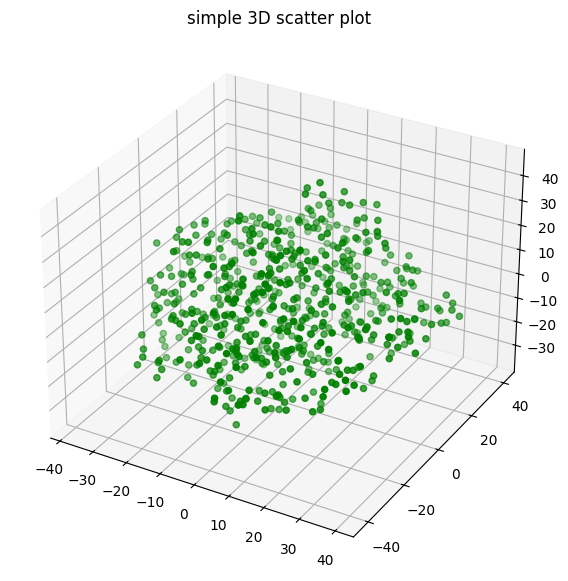

In [34]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
  
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(embeds_df.x, embeds_df.y, embeds_df.z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()


In [43]:
word1 = get_word_embedding(model, "nlp")
word2 = get_word_embedding(model, "language")

cos = nn.CosineSimilarity(dim=0)
output = cos(word1, word2)
output

tensor(0.6113)